In [441]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [442]:
def cv2_imshow(img):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)

<b>1. Read an image. Develop a Python function called get transformation matrix that calculates the 2D transformation matrix that rotates an image about its center. The function inputs are image width, image height, and rotation angle. The function output is the 2D transformation matrix.
Compute and report the output of the function get transformation matrix for the rotation angle = π/6</b>

In [443]:
img = cv2.imread('./image.png')
img.shape

(337, 409, 3)

In [444]:
img_ht = img.shape[0]
img_wt = img.shape[1]

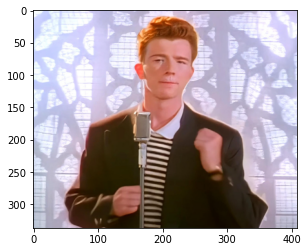

In [445]:
cv2_imshow(img)

In [446]:
cv2.imshow("Image", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [447]:
# https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326
def get_transformation_matrix(img_ht, img_wt, rot):
    x_center = img_wt // 2
    y_center = img_ht // 2
    
    sin = np.sin(rot)
    cos = np.cos(rot)
    
    center_translation_matrix = np.array([[1, 0, -x_center],
                                         [0, 1, -y_center],
                                         [0, 0, 1]])
    
    transformation_matrix = np.array([[cos, sin, 0],
                                      [-sin, cos, 0],
                                      [0, 0, 1]])
    
    inv_center_translation_matrix = np.array([[1, 0, x_center],
                                              [0, 1, y_center],
                                              [0, 0, 1]])

    
    return inv_center_translation_matrix @ transformation_matrix @ center_translation_matrix

In [448]:
transformation_matrix = get_transformation_matrix(img.shape[0], img.shape[1], np.pi / 6)

In [449]:
transformation_matrix

array([[  0.8660254 ,   0.5       , -56.66918237],
       [ -0.5       ,   0.8660254 , 124.50773216],
       [  0.        ,   0.        ,   1.        ]])

<b>2. Show the results of various geometrical operations on the same image.</b>

In [450]:
def flip(img, axis = 0):
    width = img.shape[1]
    height = img.shape[0]
    
    
    # Horizontal Flip
    if axis == 0:
        flipped_img = img[:, ::-1, :]
    # Vertical Flip
    elif axis == 1:
        transformation_matrix = np.identity(width)[::-1, :]
        flipped_img = img.transpose(2, 0, 1) @ transformation_matrix

        flipped_img = img[::-1, :, :]
        
    return flipped_img

In [451]:
def translate(img, tx, ty):
    width = img.shape[1]
    height = img.shape[0]
    transformation_matrix = np.array([[1, 0, tx],
                                      [0, 1, ty]]).astype(np.float32)
    
    return cv2.warpAffine(img, transformation_matrix, (width, height))
    

In [452]:
def rotate(img, rotation_angle):
    width = img.shape[1]
    height = img.shape[0]
    transformation_matrix = get_transformation_matrix(height, width, rotation_angle)
    
    return cv2.warpAffine(img, transformation_matrix[:2], (width, height))

In [453]:
def scale(img, scale_factor = 1):
    width = img.shape[1]
    height = img.shape[0]
    
    scaled_width = int(width * scale_factor)
    scaled_height = int(height * scale_factor)
    
    return cv2.resize(img, (scaled_width, scaled_height), interpolation = cv2.INTER_AREA)

In [454]:
def shear(img, shear_x, shear_y):
    width = img.shape[1]
    height = img.shape[0]
    transformation_matrix = np.array([[1, shear_x, 0],
                                      [shear_y, 1, 0]]).astype(np.float32)
    
    return cv2.warpAffine(img, transformation_matrix, (width, height))

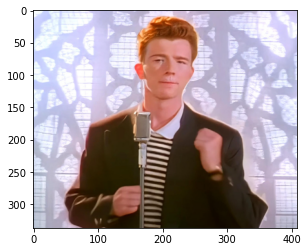

In [455]:
cv2_imshow(img)

In [464]:
%mkdir assignment-1
%cd assignment-1
%mkdir question-2
%mkdir question-3
%cd ..

D:\__Program Files\__Image-Processing\assignment-1
D:\__Program Files\__Image-Processing


<b>Translation along x and y</b>

True

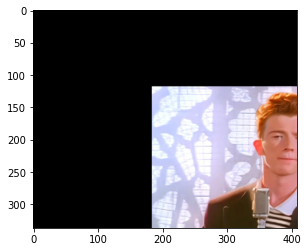

In [458]:
translated_img = translate(img, img_wt * 0.45, img_ht * 0.35)
cv2_imshow(translated_img)
cv2.imwrite('./assignment-1/question-2/translation.png', translated_img)

<b>Rotation about the center of the image in anti-clockwise direction</b>

True

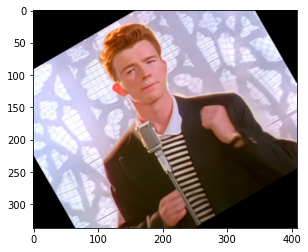

In [459]:
rotated_img = rotate(img, np.pi / 6)
cv2_imshow(rotated_img)
cv2.imwrite('./assignment-1/question-2/rotation-30deg.png', rotated_img)

<b>Scaling by scaling factor</b>

In [420]:
img.shape

(337, 409, 3)

In [421]:
scaled_img = scale(img, scale_factor = 3)
scaled_img.shape

(1011, 1227, 3)

True

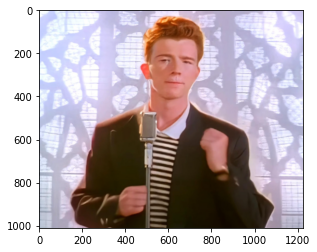

In [460]:
cv2_imshow(scaled_img)
cv2.imwrite('./assignment-1/question-2/scaled.png', scaled_img)

In [423]:
cv2.imshow('Scaled Image', scaled_img)
cv2.waitKey()
cv2.destroyAllWindows()

<b>Shearing along x and y axes</b>

True

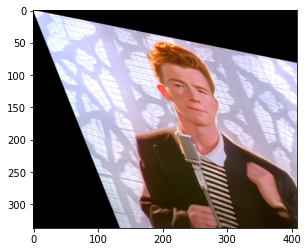

In [461]:
sheared_img = shear(img, 0.4, 0.2)
cv2_imshow(sheared_img)
cv2.imwrite('./assignment-1/question-2/sheared.png', sheared_img)

<b>Flipping - horizontal and vertical</b>

In [425]:
flipped_x = flip(img, axis = 0)
flipped_y = flip(img, axis = 1)

True

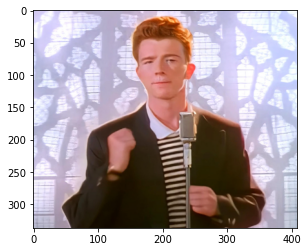

In [462]:
cv2_imshow(flipped_x)
cv2.imwrite('./assignment-1/question-2/flipped-horizontally.png', flipped_x)

True

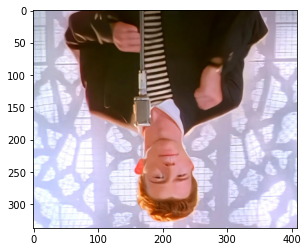

In [463]:
cv2_imshow(flipped_y)
cv2.imwrite('./assignment-1/question-2/flipped-vertically.png', flipped_y)

<b>3. Perform Affine transformation on the same image and show the results.</b>

True

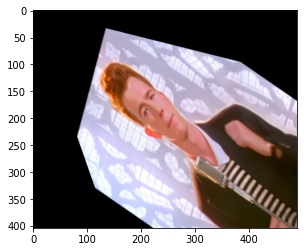

In [466]:
# Defining an affine transformation
translate_x = 10
translate_y = 5
rotation_angle = np.pi / 3
scaling_factor = 1.2
shear_x = 0.35
shear_y = 0.25

out = img
out = translate(out, translate_x, translate_y)
out = rotate(out, rotation_angle)
out = scale(out, scale_factor = scaling_factor)
out = shear(out, shear_x, shear_y)

cv2_imshow(out)
cv2.imwrite('./assignment-1/question-3/affine-transformed.png', out)